<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alexm\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🟩 Top Companies Bar Plot (2.20.1)

C:\Users\alexm\AppData\Local\Temp\ipykernel_33112\2665659397.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, y='company_name', x='salary_year_avg', palette='viridis')


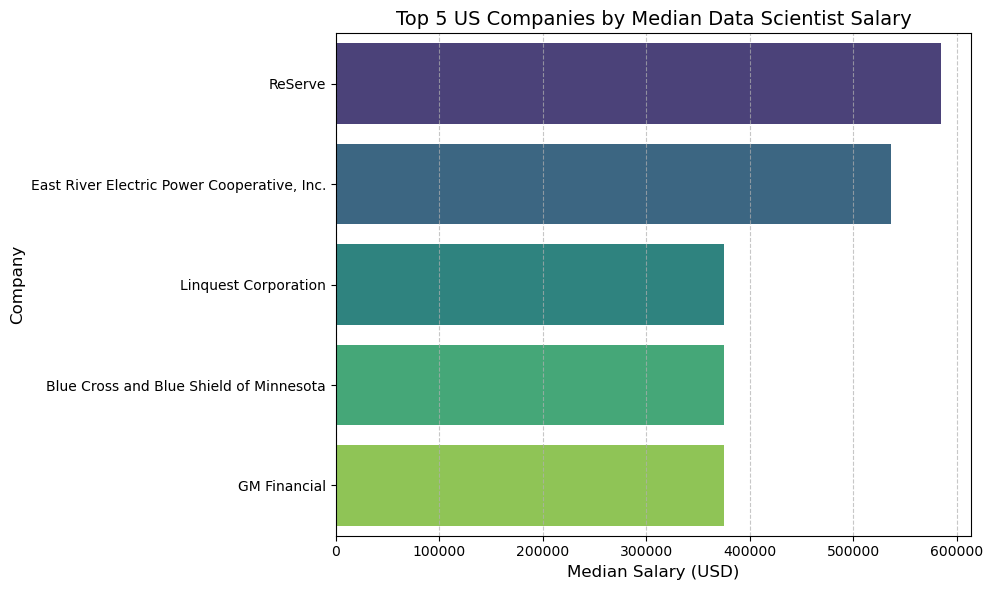

In [9]:
import seaborn as sns

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].copy()

df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

grouped = df_DS_US.groupby('company_name')['salary_year_avg'].median()

top_5 = grouped.sort_values(ascending=False).head(5)
top_5 = top_5.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, y='company_name', x='salary_year_avg', palette='viridis')

plt.title('Top 5 US Companies by Median Data Scientist Salary', fontsize=14)
plt.xlabel('Median Salary (USD)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

## 🟨 Data Scientist Salary Histogram (2.20.2)

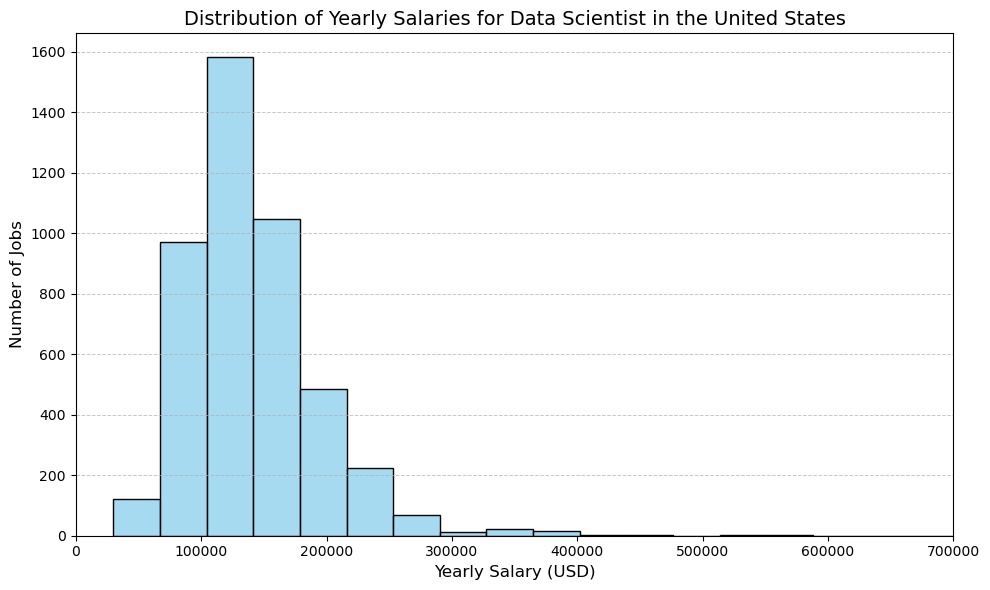

In [11]:
import seaborn as sns

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].copy()

df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_DS_US,
    x='salary_year_avg',
    bins=25,
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States', fontsize=14)
plt.xlabel('Yearly Salary (USD)', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

C:\Users\alexm\AppData\Local\Temp\ipykernel_33112\4227479003.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


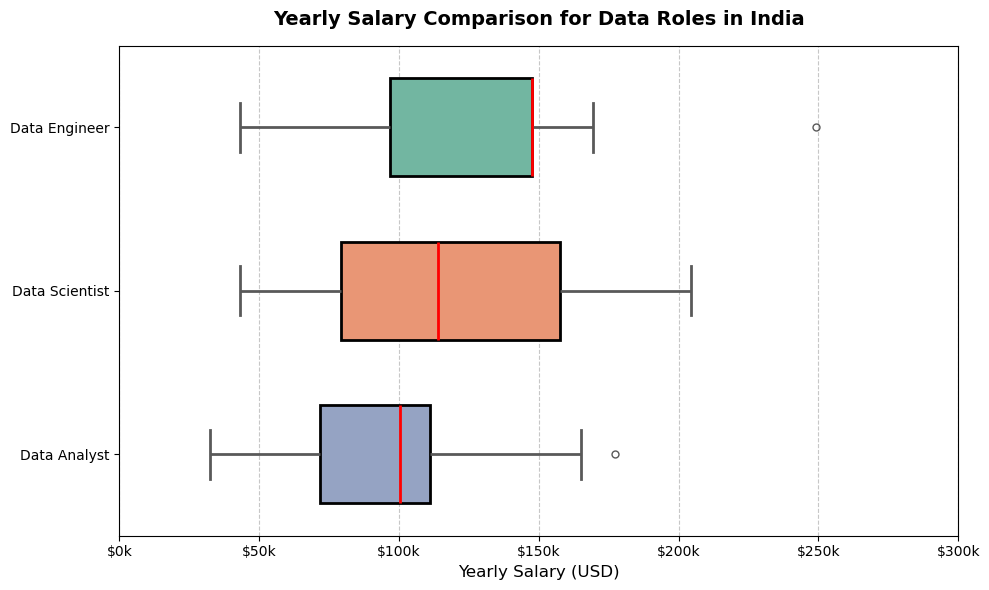

In [16]:
from matplotlib.ticker import FuncFormatter

# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_filter = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'India')
].copy()

df_filter = df_filter.dropna(subset=['salary_year_avg'])

job_list = [df_filter[df_filter['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filter,
    x='salary_year_avg',
    y='job_title_short',
    palette='Set2',
    linewidth=2,
    fliersize=5,
    width=0.6,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='red', linewidth=2)
)

# X-axis formatting: limit and dollars in 'k'
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Labels and title
plt.title('Yearly Salary Comparison for Data Roles in India', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Yearly Salary (USD)', fontsize=12)
plt.ylabel('', fontsize=12)

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

## 🟨 Salary Distribution for United States (2.20.4)

C:\Users\alexm\AppData\Local\Temp\ipykernel_33112\626750135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


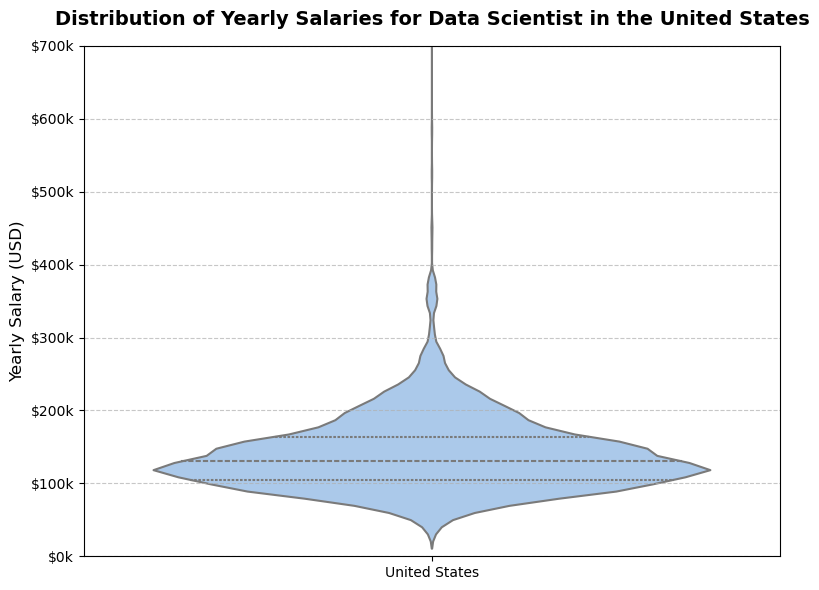

In [19]:
import seaborn as sns

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].copy()

df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_DS_US,
    x='job_country',
    y='salary_year_avg',
    inner='quartile',
    linewidth=1.5,
    palette='pastel'
)

# Y-axis formatting: limit and currency style
plt.ylim(0, 700000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Labels and title
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)', fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---